## Monte Carlo algorithm to simulate the Ising model

- $H$ is the magnetic field and $\mu$ is the magnetic moment associated with each spin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [2]:
def calculate_energe(lattice):
    # 边界当作0,每条边算了两次
    kern = ndi.generate_binary_structure(2,1)
    kern[1][1] = False
    arr = -lattice * ndi.convolve(lattice, kern, mode='constant')
    return arr.sum()

In [13]:
def calculate_energy(lattice, i, j):
    # Calculate energy contribution from nearest neighbors
    neighbors_sum = (
        lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] +
        lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
    )
    return -lattice[i, j] * neighbors_sum

def monte_carlo_step(lattice, temperature):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)

    current_energy = calculate_energy(lattice, i, j)
    # Try flipping the spin
    lattice[i, j] *= -1
    
    new_energy = calculate_energy(lattice, i, j)
    energy_diff = new_energy - current_energy
    
    if energy_diff > 0 and np.random.rand() > np.exp(-energy_diff /(kbeta*temperature)):
        # Revert the spin flip
        lattice[i, j] *= -1

def simulate_ising_model(L, num_sweeps, temperature):
    lattice = np.random.choice([-1, 1], size=(L, L))
    energies = []
    magnetizations = []

    for _ in range(num_sweeps):
        for _ in range(L * L):
            monte_carlo_step(lattice, temperature)
        
        total_energy = -np.sum([
            calculate_energy(lattice, i, j) for i in range(L) for j in range(L)
        ]) / 2.0  # Each interaction counted twice
        print(total_energy,end='\t')
        print(calculate_energe(lattice),end='|')
        total_magnetization = np.sum(lattice)
        
        energies.append(total_energy)
        magnetizations.append(total_magnetization)

    return lattice, energies, magnetizations


def plot_state(lattice):
    import matplotlib as mpl
    cmap = (mpl.colors.ListedColormap(['#F0E825', 'blue']))
    fig,ax = plt.subplots()
    ax.imshow(lattice,cmap=cmap  )#interpolation='bicubic'
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

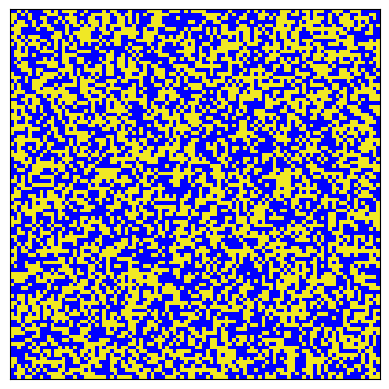

In [6]:
L= 100
lattice = np.random.choice([-1, 1], size=(L, L))
fig, ax = plot_state(lattice)

64.0	-104|80.0	-136|72.0	-120|76.0	-140|96.0	-168|88.0	-160|76.0	-124|72.0	-120|76.0	-152|112.0	-208|104.0	-196|120.0	-224|100.0	-184|112.0	-204|128.0	-240|124.0	-228|120.0	-220|104.0	-192|112.0	-216|104.0	-208|80.0	-160|84.0	-164|100.0	-188|100.0	-164|108.0	-188|120.0	-224|116.0	-228|104.0	-192|104.0	-192|104.0	-180|124.0	-212|104.0	-176|128.0	-228|152.0	-272|164.0	-288|168.0	-304|152.0	-272|164.0	-300|152.0	-280|156.0	-288|164.0	-300|172.0	-308|168.0	-296|184.0	-328|184.0	-336|164.0	-300|168.0	-300|172.0	-320|164.0	-296|172.0	-304|180.0	-320|156.0	-272|164.0	-288|164.0	-288|168.0	-304|148.0	-260|172.0	-308|184.0	-328|184.0	-328|176.0	-312|184.0	-332|192.0	-348|172.0	-320|168.0	-296|160.0	-288|156.0	-284|120.0	-228|136.0	-232|124.0	-216|140.0	-252|160.0	-280|184.0	-328|156.0	-280|144.0	-260|148.0	-264|172.0	-304|192.0	-344|176.0	-312|184.0	-332|192.0	-348|164.0	-292|172.0	-308|148.0	-264|108.0	-196|120.0	-204|104.0	-196|96.0	-176|88.0	-160|72.0	-152|104.0	-196|112.0	-220|104.0	-188|12

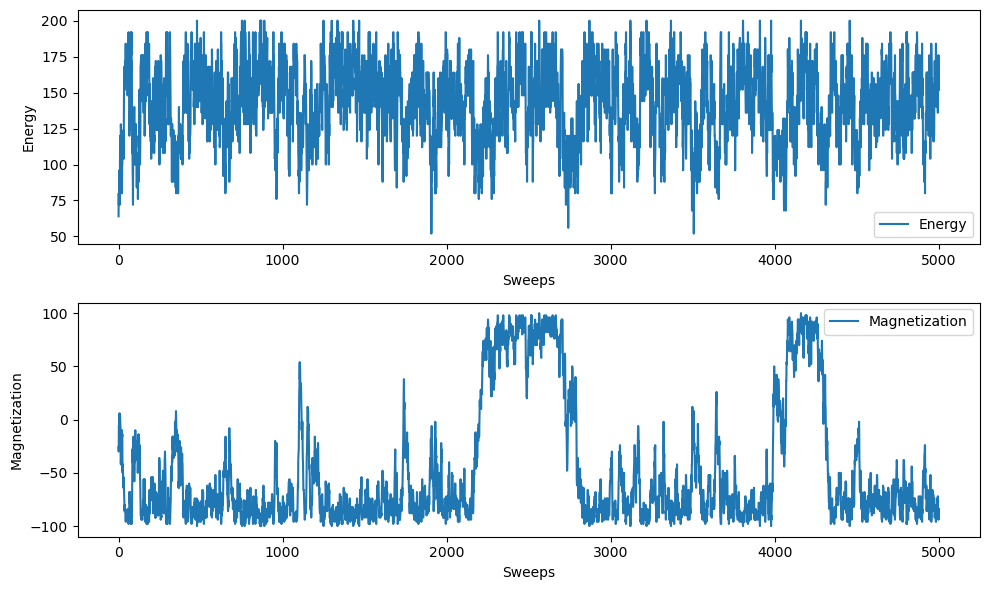

In [14]:
# Parameters
L = 10  # Size of the lattice
num_sweeps = 5000  # Number of sweeps
T = 2.3 # Temperature
kbeta = 1.0  # Boltzmann constant

lattice, energies, magnetizations = simulate_ising_model(L, num_sweeps, T)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(energies, label='Energy')
plt.xlabel('Sweeps')
plt.ylabel('Energy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(magnetizations, label='Magnetization')
plt.xlabel('Sweeps')
plt.ylabel('Magnetization')
plt.legend()

plt.tight_layout()
plt.show()